## Assignment 5.1 
## Linear perceptron

A linear perceptron is a simple method of binary classification that fits a linear decision surface to the training set by minimizing the distance of misclassified points to the decision boundary. E.g. if a point $y_i=1$ from the positive class is misclassified, then $x_i^T w + b < 0$. The same for the negative class $y_i=-1$, but the sign is the opposite. The goal is to minimize:

$L(w)=-\sum_{i \in M} y_i(x_i^T w + b)$,

where $M$ is the set of misclassified points. This quantity is non negative and proportional to the distance of misclassified points to the decision boundary. The task is to generate a dataset and to fit a linear decision boundary by minimizing $L(w)$ using the gradient descent.

The algorithm should iterate through all the points of the dataset (one full cycle is called an epoch) and do a step of gradient descent for each of the misclassified points. Plot the value of the objective function $L(w)$ after each epoch in order to monitor the convergence of the method. If the dataset is linearly separable, it should converge to zero after some number of iterations. The objective will oscillate if it is not possible to separate the dataset with a line or the gradient descent step is chosen too high.

Generate two versions of the dataset in 2D: one which is linearly separable and one which is not. A useful function is ```sklearn.datasets.make_blobs``` (be careful, it generates target values $y_i \in \{0,1\}$ it generates by default). Fit a perceptron to each of the datasets while plotting the objective function value after each epoch. Visualize each of the datasets among with the decision boundary. 

You're expected to produce 4 plots in total (two visualizations and two objective functions plots) for 2 datasets, where one is linearly separable and the other is not. See the examples below.


In [37]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs


In [38]:
X1, y1 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1)
y1[y1 == 0] = -1
X1 = np.column_stack((np.ones(X1.shape[0]), X1))

X2, y2 = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=5)
y2[y2 == 0] = -1
X2 = np.column_stack((np.ones(X2.shape[0]), X2))


============== Starting to Minimize ===============
epoch: 0, miss_class: 100, l: 630.48854
epoch: 1, miss_class: 49, l: 33.22437
epoch: 2, miss_class: 0, l: 0.00000
epoch: 3, miss_class: 0, l: 0.00000
epoch: 4, miss_class: 0, l: 0.00000
epoch: 5, miss_class: 0, l: 0.00000
epoch: 6, miss_class: 0, l: 0.00000
epoch: 7, miss_class: 0, l: 0.00000
epoch: 8, miss_class: 0, l: 0.00000
epoch: 9, miss_class: 0, l: 0.00000

============== Starting to Minimize ===============
epoch: 0, miss_class: 63, l: 655.70808
epoch: 1, miss_class: 56, l: 158.56084
epoch: 2, miss_class: 26, l: 74.88420
epoch: 3, miss_class: 26, l: 47.06951
epoch: 4, miss_class: 32, l: 31.75952
epoch: 5, miss_class: 24, l: 21.63257
epoch: 6, miss_class: 45, l: 24.60718
epoch: 7, miss_class: 32, l: 67.93582
epoch: 8, miss_class: 32, l: 24.38651
epoch: 9, miss_class: 50, l: 27.84091


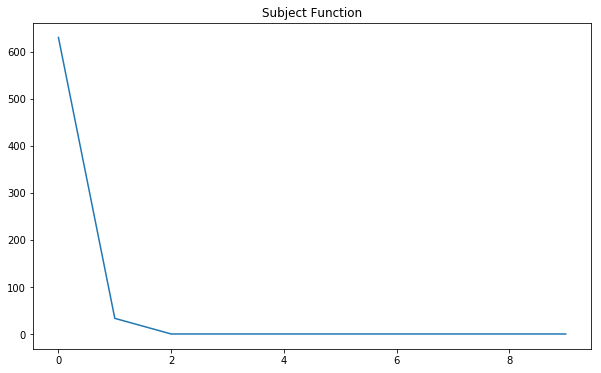

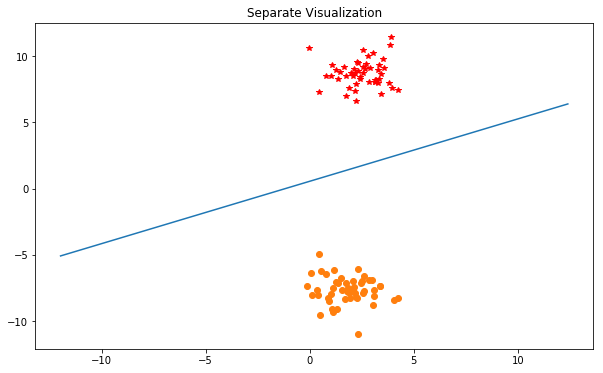

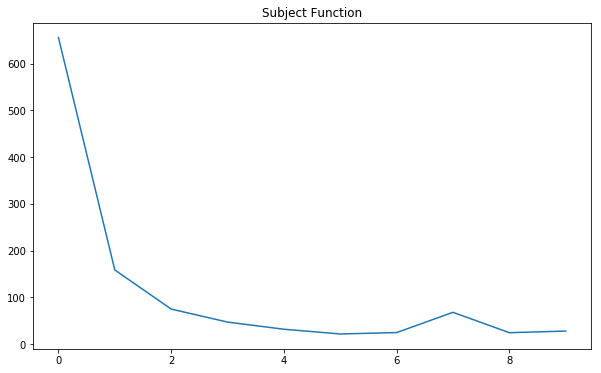

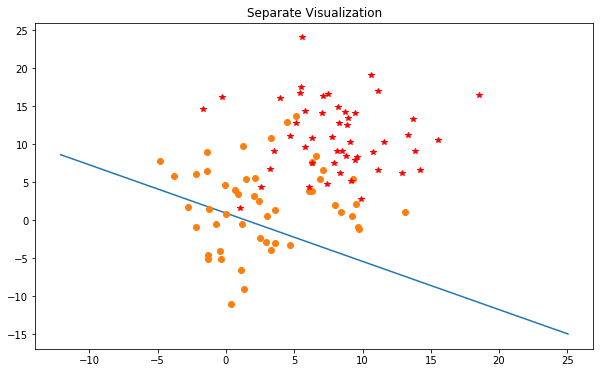

In [39]:
def l(x, y, w):
    if x.shape[0] == 0:
        return 0
    
    return - np.sum(y * x.dot(w));

def grad_l(x, y):
    if x.shape[0] == 0:
        return 0
    
    return - np.sum(np.repeat(y[:, np.newaxis], 3, 1) * x, axis=0)

def classify(x, y, w):
    return y * x.dot(w)

def main(X, y):
    print('\n============== Starting to Minimize ===============')
    class_1 = y == 1
    x_class_1 = X[class_1]
    class_2 = y == -1
    x_class_2 = X[class_2]
    
    Epoch = 10
    learning_rate = 1e-3
    w = np.random.random(3)
    l_values = []
    for epoch in range(Epoch):
        class_val = classify(X, y, w)
        miss_class_x = X[class_val < 0]
        miss_class_y = y[class_val < 0]
        
        l_val = l(miss_class_x, miss_class_y, w) 
        l_values.append(l_val)
        
        grad = grad_l(miss_class_x, miss_class_y)
        
        w = w - learning_rate * grad
        
        print('epoch: {}, miss_class: {}, l: {:.5f}'.format(epoch, miss_class_x.shape[0], l_val))
        
    _x_val = np.linspace(np.min(X) - 1, np.max(X) + 1, 100)
    
    plt.figure(figsize=(10, 6))
    plt.title('Subject Function')
    plt.plot(l_values)
    
    plt.figure(figsize=(10, 6))
    plt.title('Separate Visualization')
    plt.plot(_x_val, (- w[0] - w[1] * _x_val) / w[2])
    plt.plot(x_class_1[:, 1], x_class_1[:, 2], 'o')
    plt.plot(x_class_2[:, 1], x_class_2[:, 2], '*r')
    
main(X1, y1)
main(X2, y2)